In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'DataSample_converted.xlsx'
data = pd.read_excel(file_path)



In [33]:
# Calculate basic descriptive statistics for the four columns
descriptive_stats = data[['Owner PlayTracker', 'Owner Gamalytic', 'Owner VG Insights', 'Owner Steamspy']].describe()

# Display the descriptive statistics
descriptive_stats


,Owner PlayTracker,Owner Gamalytic,Owner VG Insights,Owner Steamspy
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02
mean,1.564485e+06,8.701792e+05,8.073870e+05,1.099238e+06
std,4.591017e+06,2.330824e+06,2.184921e+06,3.188829e+06
min,3.300000e+03,1.900000e+03,2.500000e+03,1.000000e+03
25%,1.796000e+05,5.290000e+04,5.250000e+04,1.195000e+05
50%,5.591000e+05,1.992000e+05,1.753000e+05,3.620000e+05
75%,1.585000e+06,6.926000e+05,5.762000e+05,8.710000e+05
max,7.299000e+07,2.790000e+07,2.494000e+07,3.967500e+07


In [34]:
# Calculate correlation matrix
correlation_matrix = data[['Owner PlayTracker', 'Owner Gamalytic', 'Owner VG Insights', 'Owner Steamspy']].corr()

# Display the correlation matrix
correlation_matrix


,Owner PlayTracker,Owner Gamalytic,Owner VG Insights,Owner Steamspy
Owner PlayTracker,1.000000,0.871790,0.868077,0.881927
Owner Gamalytic,0.871790,1.000000,0.965890,0.946097
Owner VG Insights,0.868077,0.965890,1.000000,0.946685
Owner Steamspy,0.881927,0.946097,0.946685,1.000000


In [36]:
# Calculate the average owners across all sources
data['Average Owners'] = data[['Owner PlayTracker', 'Owner Gamalytic', 'Owner VG Insights', 'Owner Steamspy']].mean(axis=1)

# Calculate absolute errors
data['Error PlayTracker'] = abs(data['Owner PlayTracker'] - data['Average Owners'])
data['Error Gamalytic'] = abs(data['Owner Gamalytic'] - data['Average Owners'])
data['Error VG Insights'] = abs(data['Owner VG Insights'] - data['Average Owners'])
data['Error Steamspy'] = abs(data['Owner Steamspy'] - data['Average Owners'])

# Calculate mean absolute error for each source
mean_absolute_errors = data[['Error PlayTracker', 'Error Gamalytic', 'Error VG Insights', 'Error Steamspy']].mean()

# Display the mean absolute errors
mean_absolute_errors


Error PlayTracker    627069.218241
Error Gamalytic      310469.381107
Error VG Insights    328129.315961
Error Steamspy       303363.843648
dtype: float64

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'DataSample_converted.xlsx' 
data = pd.read_excel(file_path)

start_col = data.columns.get_loc('Category')
price_data = data.iloc[:, start_col:]

price_data = price_data.reset_index().melt(id_vars=['index', 'Category'], var_name='Region', value_name='Price')


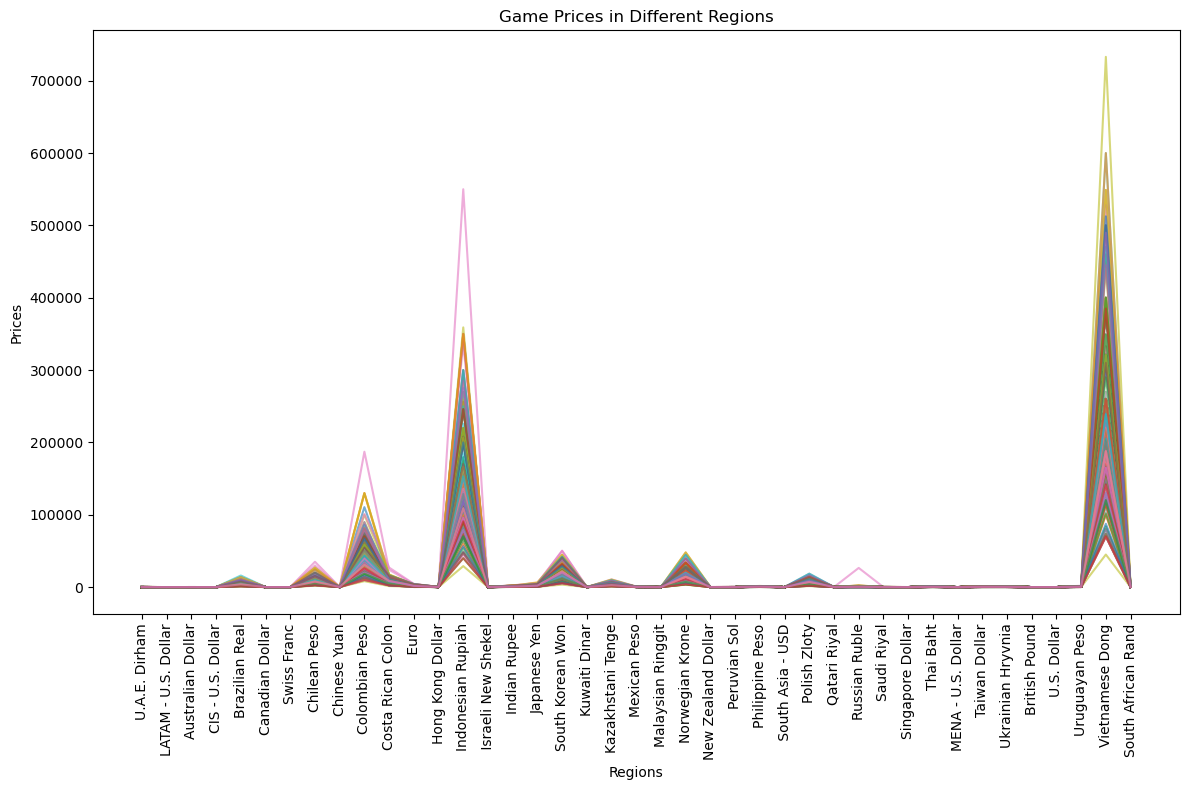

In [38]:
import matplotlib.pyplot as plt

df = pd.read_excel(file_path)

# Extract the columns that represent the prices in different regions
price_columns = df.columns[df.columns.get_loc('Category') + 1:]

# Plot the price data for each game across different regions
plt.figure(figsize=(12, 8))

for idx, row in df.iterrows():
    prices = row[price_columns]
    plt.plot(price_columns, prices, label=f'Game {idx}', alpha=0.6)

plt.xlabel('Regions')
plt.ylabel('Prices')
plt.title('Game Prices in Different Regions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [47]:
# Extract prices in US dollars and corresponding regions
usd_prices = df['U.S. Dollar']
region_prices = df[price_columns]

# Identify the most common pricing strategies for each dollar price
price_strategy_counts = {}

for usd_price in usd_prices.unique():
    strategies = region_prices[usd_prices == usd_price].apply(tuple, axis=1)
    strategy_counts = strategies.value_counts().head(5)
    price_strategy_counts[usd_price] = strategy_counts

price_strategy_counts


{16.99: (53.0, 8.99, 23.95, 11.0, 5999.0, 22.79, 17.5, 9200.0, 68.0, 41500.0, 6600.0, 1699.0, 89.0, 125999.0, 62.95, 770.0, 1850.0, 17500.0, 4.15, 4500.0, 191.99, 39.0, 19000.0, 25.49, 34.0, 487.95, 10.0, 6599.0, 49.99, 650.0, 51.95, 18.5, 299.0, 8.99, 328.0, 360.0, 14.49, 16.99, 510.0, 210000.0, 150.0)     1
 (45.0, 6.99, 24.95, 9.49, 5249.0, 21.99, 18.99, 9200.0, 58.0, 41500.0, 7400.0, 1649.0, 108.0, 145999.0, 62.95, 770.0, 1900.0, 18500.0, 3.0, 4500.0, 198.99, 43.0, 19000.0, 24.99, 37.5, 539.0, 7.49, 7799.0, 37.99, 620.0, 36.49, 16.0, 349.0, 6.99, 288.0, 360.0, 14.29, 16.99, 510.0, 226000.0, 160.0)     1
 (64.0, 8.99, 23.95, 9.99, 3899.0, 18.99, 16.5, 8800.0, 68.0, 35000.0, 7400.0, 1599.0, 110.0, 135999.0, 62.95, 799.0, 1680.0, 18000.0, 3.0, 2500.0, 169.99, 39.0, 14000.0, 19.99, 43.95, 459.95, 16.99, 6099.0, 37.99, 0.0, 70.0, 20.0, 349.0, 8.99, 438.0, 259.0, 12.99, 16.99, 369.0, 178000.0, 199.0)      1
 (45.0, 8.99, 23.95, 9.49, 4724.0, 19.49, 17.0, 9200.0, 58.0, 41500.0, 7400.0, 16

In [48]:
# Output column names against regions for easy viewing
price_columns_list = list(price_columns)
print("Order of price listing: ")
print(price_columns_list)

print("\n Most Frequent Pricing Strategy: ")

for usd_price, strategies in price_strategy_counts.items():
    print(f"\n***{usd_price}USD***")
    for strategy, frequency in strategies.items():
        print(f"Frequent Pricing Strategy: {strategy}, Frequency: {frequency}")

price_columns_list, price_strategy_counts



Order of price listing: 
['U.A.E. Dirham', 'LATAM - U.S. Dollar', 'Australian Dollar', 'CIS - U.S. Dollar', 'Brazilian Real', 'Canadian Dollar', 'Swiss Franc', 'Chilean Peso', 'Chinese Yuan', 'Colombian Peso', 'Costa Rican Colon', ' Euro', 'Hong Kong Dollar', 'Indonesian Rupiah', ' Israeli New Shekel', 'Indian Rupee', 'Japanese Yen', 'South Korean Won', 'Kuwaiti Dinar', 'Kazakhstani Tenge', 'Mexican Peso', 'Malaysian Ringgit', 'Norwegian Krone', 'New Zealand Dollar', 'Peruvian Sol', 'Philippine Peso', ' South Asia - USD', 'Polish Zloty', 'Qatari Riyal', 'Russian Ruble', 'Saudi Riyal', 'Singapore Dollar', 'Thai Baht', 'MENA - U.S. Dollar', 'Taiwan Dollar', 'Ukrainian Hryvnia', 'British Pound', 'U.S. Dollar', 'Uruguayan Peso', 'Vietnamese Dong', 'South African Rand']

 Most Frequent Pricing Strategy: 

***16.99USD***
Frequent Pricing Strategy: (53.0, 8.99, 23.95, 11.0, 5999.0, 22.79, 17.5, 9200.0, 68.0, 41500.0, 6600.0, 1699.0, 89.0, 125999.0, 62.95, 770.0, 1850.0, 17500.0, 4.15, 4500.0,

(['U.A.E. Dirham',
  'LATAM - U.S. Dollar',
  'Australian Dollar',
  'CIS - U.S. Dollar',
  'Brazilian Real',
  'Canadian Dollar',
  'Swiss Franc',
  'Chilean Peso',
  'Chinese Yuan',
  'Colombian Peso',
  'Costa Rican Colon',
  ' Euro',
  'Hong Kong Dollar',
  'Indonesian Rupiah',
  ' Israeli New Shekel',
  'Indian Rupee',
  'Japanese Yen',
  'South Korean Won',
  'Kuwaiti Dinar',
  'Kazakhstani Tenge',
  'Mexican Peso',
  'Malaysian Ringgit',
  'Norwegian Krone',
  'New Zealand Dollar',
  'Peruvian Sol',
  'Philippine Peso',
  ' South Asia - USD',
  'Polish Zloty',
  'Qatari Riyal',
  'Russian Ruble',
  'Saudi Riyal',
  'Singapore Dollar',
  'Thai Baht',
  'MENA - U.S. Dollar',
  'Taiwan Dollar',
  'Ukrainian Hryvnia',
  'British Pound',
  'U.S. Dollar',
  'Uruguayan Peso',
  'Vietnamese Dong',
  'South African Rand'],
 {16.99: (53.0, 8.99, 23.95, 11.0, 5999.0, 22.79, 17.5, 9200.0, 68.0, 41500.0, 6600.0, 1699.0, 89.0, 125999.0, 62.95, 770.0, 1850.0, 17500.0, 4.15, 4500.0, 191.99, 39.